# Plot wav file

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
sampling_freq, audio = wavfile.read('./myclip.wav')
print( '\nShape:', audio.shape)
print ('Datatype:', audio.dtype)
print ('Duration:', round(audio.shape[0] / float(sampling_freq), 3), 'seconds')


Shape: (264600, 2)
Datatype: int16
Duration: 6.0 seconds


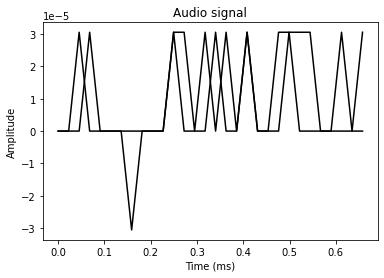

In [2]:
audio = audio / (2.**15)
audio=audio[:30]
x_values = np.arange(0, len(audio), 1) / float(sampling_freq)
x_values *= 1000
plt.plot(x_values, audio, color='black')
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude')
plt.title('Audio signal')
plt.show()

In [3]:
import pylab
import wave
def graph_spectrogram(wav_file):
    sound_info, frame_rate = get_wav_info(wav_file)
    pylab.figure(num=None, figsize=(19, 12))
    pylab.subplot(111)
    pylab.title('spectrogram of %r' % wav_file)
    pylab.specgram(sound_info, Fs=frame_rate)
    pylab.savefig('spectrogram.png')
def get_wav_info(wav_file):
    wav = wave.open(wav_file, 'r')
    frames = wav.readframes(-1)
    sound_info = pylab.fromstring(frames, 'int16')
    frame_rate = wav.getframerate()
    wav.close()
    return sound_info, frame_rate

C:\Users\Diego\AppData\Local\Temp/ipykernel_34368/21018545.py:13: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  sound_info = pylab.fromstring(frames, 'int16')


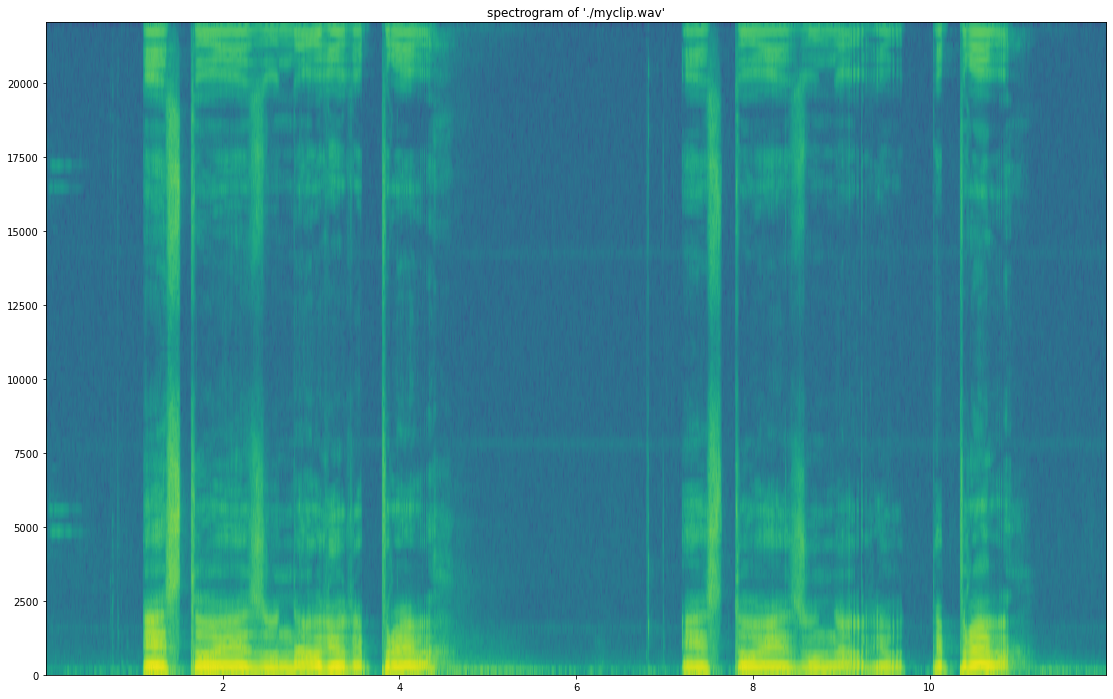

In [4]:
graph_spectrogram('./myclip.wav')

In [8]:
from matplotlib import cm
from scipy.signal import spectrogram

C:\Users\Diego\AppData\Local\Temp/ipykernel_34368/1411993724.py:17: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


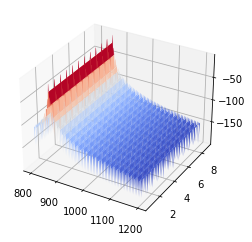

In [9]:
fs = 11240.
t = 10
time = np.arange(fs*t) / fs
frequency = sampling_freq
mysignal = np.sin(2.0 * np.pi * frequency * time)

nperseg = 2**14
noverlap = 2**13
f, t, Sxx = spectrogram(mysignal, fs, nperseg=nperseg,noverlap=noverlap)

myfilter = (f>800) & (f<1200)

f = f[myfilter]
Sxx = Sxx[myfilter, ...]

fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot_surface(f[:, None], t[None, :], 10.0*np.log10(Sxx), cmap=cm.coolwarm)
plt.show()

In [52]:
#!pip install librosa

  Using cached SoundFile-0.10.3.post1-py2.py3.cp26.cp27.cp32.cp33.cp34.cp35.cp36.pp27.pp32.pp33-none-win_amd64.whl (689 kB)
  Using cached audioread-2.1.9.tar.gz (377 kB)
  Using cached resampy-0.2.2.tar.gz (323 kB)
  Created wheel for audioread: filename=audioread-2.1.9-py3-none-any.whl size=23154 sha256=fc7cc3820abb0a05ca8591b69fece87fb342ba4dd49b86a967a1f7bf79d6bcb9
  Stored in directory: c:\users\diego\appdata\local\pip\cache\wheels\a2\a3\bd\ec1568ce7515115a11ab686d509ad302124c782af065de47ee
  Created wheel for resampy: filename=resampy-0.2.2-py3-none-any.whl size=320731 sha256=231c2caae3468955995a95b9ddcb37b2c8dd1e1845095e0256e26432c90cd9bd
  Stored in directory: c:\users\diego\appdata\local\pip\cache\wheels\86\2c\7d\46a32a246b0e5939cea2c5ec1492164073e0c5d16d666ae2cd
Successfully built audioread resampy


In [10]:
import librosa
audio_path = './myclip.wav'
x , sr = librosa.load(audio_path)
print(type(x), type(sr))
print(x.shape, sr)

<class 'numpy.ndarray'> <class 'int'>
(132300,) 22050


In [11]:
librosa.load(audio_path, sr=44100)

(array([0.0000000e+00, 0.0000000e+00, 1.5258789e-05, ..., 0.0000000e+00,
        0.0000000e+00, 1.5258789e-05], dtype=float32),
 44100)

In [12]:
librosa.load(audio_path, sr=None)


(array([0.0000000e+00, 0.0000000e+00, 1.5258789e-05, ..., 0.0000000e+00,
        0.0000000e+00, 1.5258789e-05], dtype=float32),
 44100)

In [13]:
import IPython.display as ipd
ipd.Audio(audio_path)

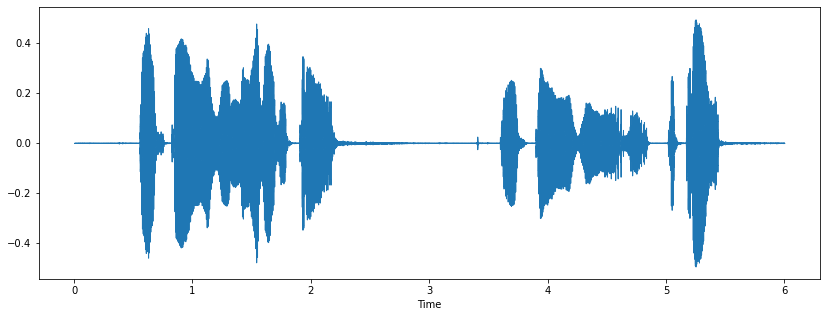

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14, 5))
librosa.display.waveshow(x, sr=sr)

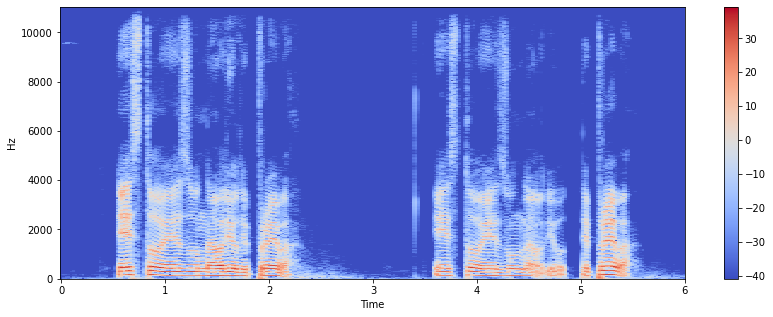

In [15]:
#display Spectrogram
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz') 
#If to pring log of frequencies  
#librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

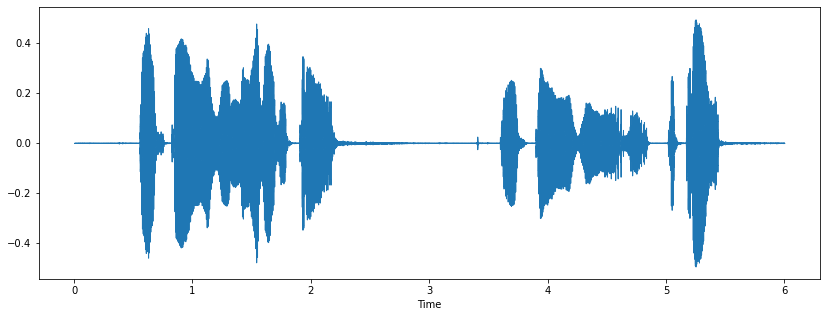

In [16]:
#Plot the signal:
plt.figure(figsize=(14, 5))
librosa.display.waveshow(x, sr=sr)

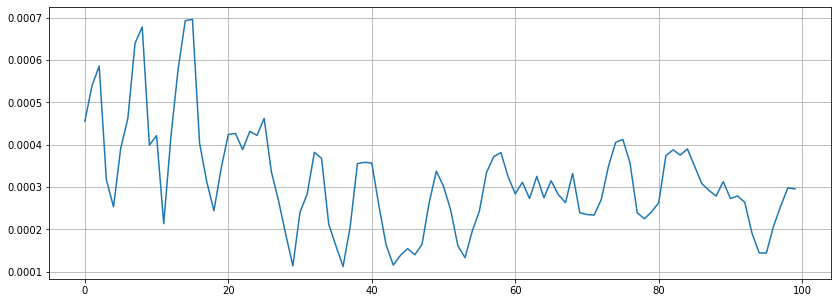

In [17]:
# Zero Crossing Rate: the rate at which the signal changes from positive to negative or back

n0 = 9000
n1 = 9100
plt.figure(figsize=(14, 5))
plt.plot(x[n0:n1])
plt.grid()

In [18]:
zero_crossings = librosa.zero_crossings(x[n0:n1], pad=False)
print(sum(zero_crossings))

0


C:\Users\Diego\AppData\Local\Temp/ipykernel_34368/819940035.py:3: FutureWarning: Pass y=[-8.4644171e-07  1.1747062e-05  5.7778338e-06 ... -8.1473636e-06
 -1.2502543e-05  5.2645601e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]


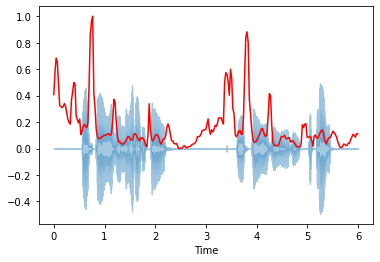

In [19]:
#spectral centroid -- centre of mass -- weighted mean of the frequencies present in the sound
import sklearn
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
spectral_centroids.shape
# Computing the time variable for visualization
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)
#Plotting the Spectral Centroid along the waveform
librosa.display.waveshow(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')

C:\Users\Diego\AppData\Local\Temp/ipykernel_34368/4249681362.py:2: FutureWarning: Pass y=[-8.4644171e-07  1.1747062e-05  5.7778338e-06 ... -8.1473636e-06
 -1.2502543e-05  5.2645601e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_rolloff = librosa.feature.spectral_rolloff(x, sr=sr)[0]


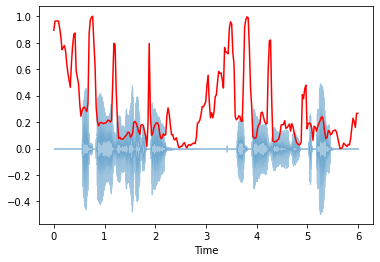

In [20]:
# spectral_rolloff is used to calculate rolloff for a given frame.
spectral_rolloff = librosa.feature.spectral_rolloff(x, sr=sr)[0]
librosa.display.waveshow(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')

(20, 259)


C:\Users\Diego\AppData\Local\Temp/ipykernel_34368/2159136199.py:2: FutureWarning: Pass y=[-8.4644171e-07  1.1747062e-05  5.7778338e-06 ... -8.1473636e-06
 -1.2502543e-05  5.2645601e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=sr)


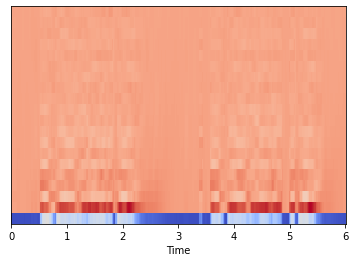

In [21]:
# MFCC
mfccs = librosa.feature.mfcc(x, sr=sr)
print(mfccs.shape)
#Displaying  the MFCCs:
librosa.display.specshow(mfccs, sr=sr, x_axis='time')


[ 1.1046421e-08  1.6109363e-08 -3.6821401e-09  0.0000000e+00
  6.4437455e-09  9.2053503e-09 -3.6821401e-09  7.3642803e-09
 -9.2053504e-10 -3.6821401e-09  1.2887491e-08  7.3642803e-09
 -3.6821401e-09 -1.1046421e-08 -1.4728561e-08  2.2092841e-08
 -5.5232103e-09  2.2092841e-08  0.0000000e+00 -3.4520065e-09]
[1.         1.         0.99999976 1.         1.         1.0000001
 0.9999999  1.         1.         1.         1.         1.
 1.         1.0000001  0.9999999  0.9999999  1.         1.
 1.         1.        ]


C:\Users\Diego\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\Diego\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


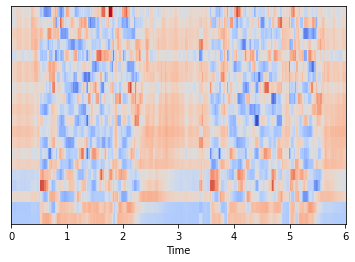

In [22]:
import sklearn
mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
print(mfccs.mean(axis=1))
print(mfccs.var(axis=1))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

C:\Users\Diego\AppData\Local\Temp/ipykernel_34368/4172952136.py:4: FutureWarning: Pass y=[-8.4644171e-07  1.1747062e-05  5.7778338e-06 ... -8.1473636e-06
 -1.2502543e-05  5.2645601e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  chromagram = librosa.feature.chroma_stft(x, sr=sr, hop_length=hop_length)


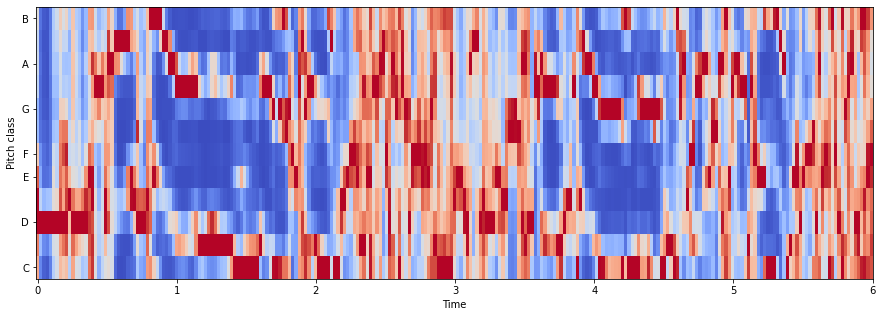

In [23]:
# Chroma Frequencies (only for music)

hop_length = 512
chromagram = librosa.feature.chroma_stft(x, sr=sr, hop_length=hop_length)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')